Классификация кошек и собак.

In [ ]:
!wget 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip' 

In [ ]:
!unzip '/content/cats_and_dogs_filtered.zip' -d '/content/data'

In [ ]:
import tensorflow as tf
import os

In [ ]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data_dir = 'data'

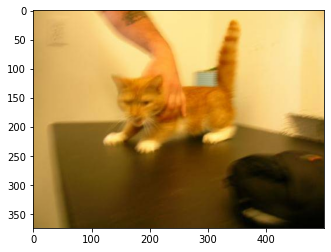

In [ ]:
img = cv2.imread(os.path.join('data','train', 'cats', 'cat.0.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data/train')

Found 2000 files belonging to 2 classes.


In [ ]:
val = tf.keras.utils.image_dataset_from_directory('data/validation')

Found 1000 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

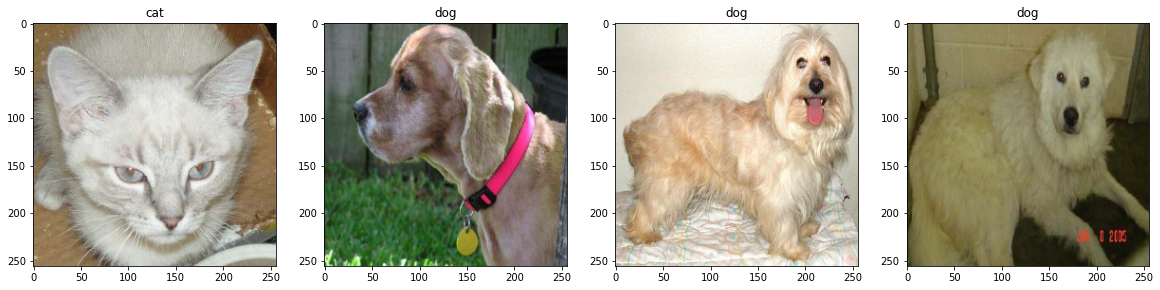

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  if batch[1][idx] == 1:
    ax[idx].title.set_text('dog')
  else:
    ax[idx].title.set_text('cat') 

In [ ]:
data = data.map(lambda x,y: (x/255, y))
val = val.map(lambda x,y: (x/255, y))

In [ ]:
train_size = int(len(data)*.9)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
test = data.skip(train_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs= 30, validation_data=val, callbacks=[tensorboard_callback])

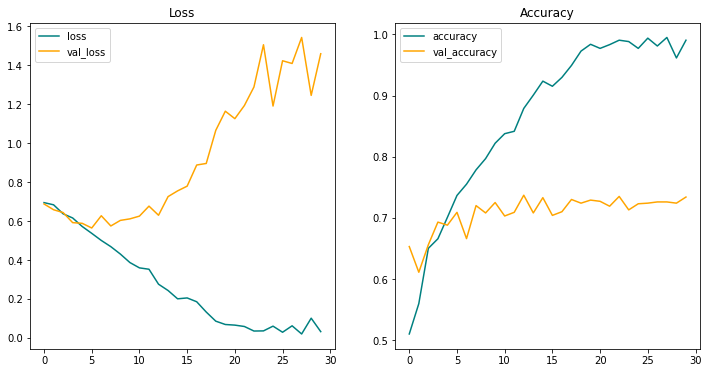

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (12, 6))

ax[0].plot(hist.history['loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_loss'], color='orange', label='val_loss')

ax[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
ax[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')

ax[0].title.set_text('Loss')
ax[1].title.set_text('Accuracy')

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")

In [ ]:
sample = test.as_numpy_iterator()
sample1 = sample.next()

In [ ]:
sample_validation_images,sample_validation_labels = sample1

In [ ]:
sample_validation_images[0].shape

(256, 256, 3)

In [ ]:
predicted = model.predict(test)

In [ ]:
predicted_label = list(np.where(predicted > 0.5, 1,0))

In [ ]:
def show_catsdogs(images, labels, predicted_labels=None):
    names = {0: "Cat", 1: "Dog"}
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {names[labels[i]]}. Pred: {names[int(predicted_labels[i])]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {names[labels[i]]}")

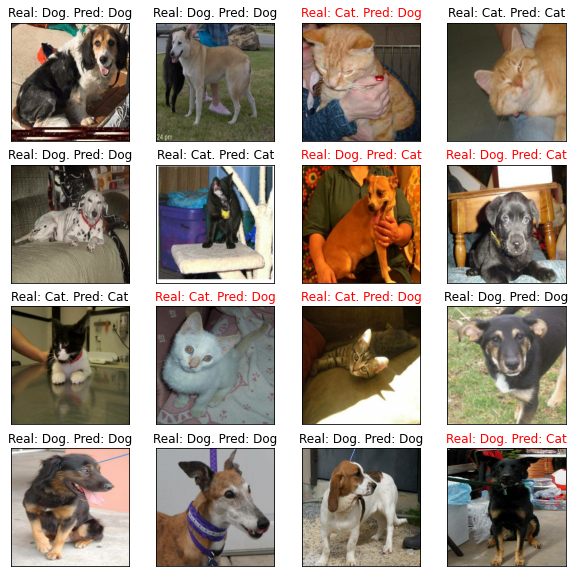

In [ ]:
show_catsdogs(sample_validation_images, sample_validation_labels, predicted_label)